# OnlineNewPopularity (data from UCI)

This notebook suggests a couple of ways to explore the data of a machine learning problem.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy
import pandas

## Download data

[Online News Popularity Data Set](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

In [3]:
import pyensae.datasource
pyensae.datasource.download_data("OnlineNewsPopularity.zip",
                      url="https://archive.ics.uci.edu/ml/machine-learning-databases/00332/")

['OnlineNewsPopularity/OnlineNewsPopularity.names',
 'OnlineNewsPopularity/OnlineNewsPopularity.csv']

In [4]:
data = pandas.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv")
data.columns = [c.strip() for c in data.columns]  # remove spaces around data
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
data.shape

(39644, 61)

In [6]:
import numpy
numeric = [c for i,c in enumerate(data.columns) if data.dtypes[i] in [numpy.float64, numpy.int64]]
len(numeric)

60

## Corr-Pair-Plots and scales

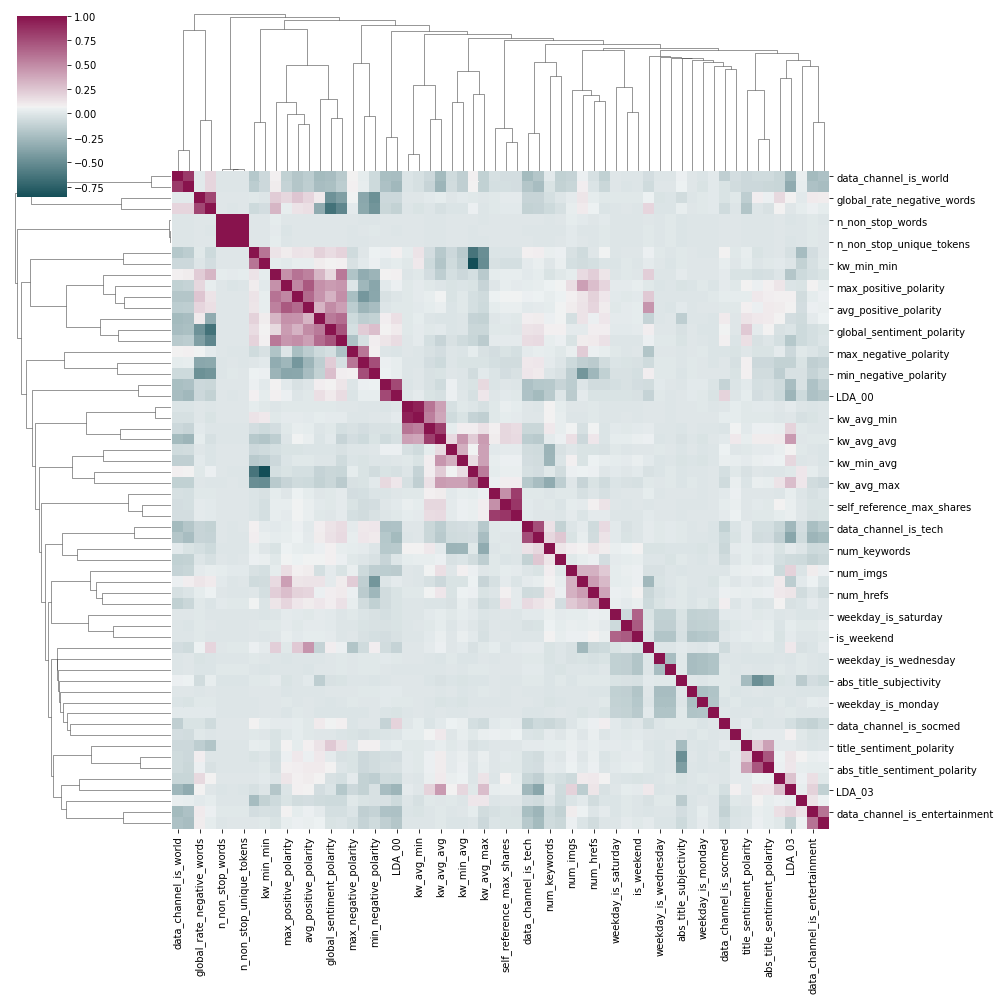

In [7]:
cmap = seaborn.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
seaborn.clustermap(data[numeric].corr(), figsize=(14, 14), cmap=cmap);

In [8]:
numeric[:5]

['timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words']

In [9]:
data_numeric5 = data[numeric[:5]]

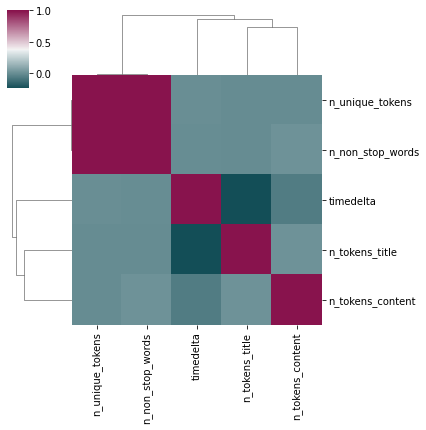

In [10]:
seaborn.clustermap(data_numeric5.corr(), figsize=(6, 6), cmap=cmap);

In [11]:
data_numeric5[::100].shape

(397, 5)

We take a subsample as the whole dataframe takes time to plot.

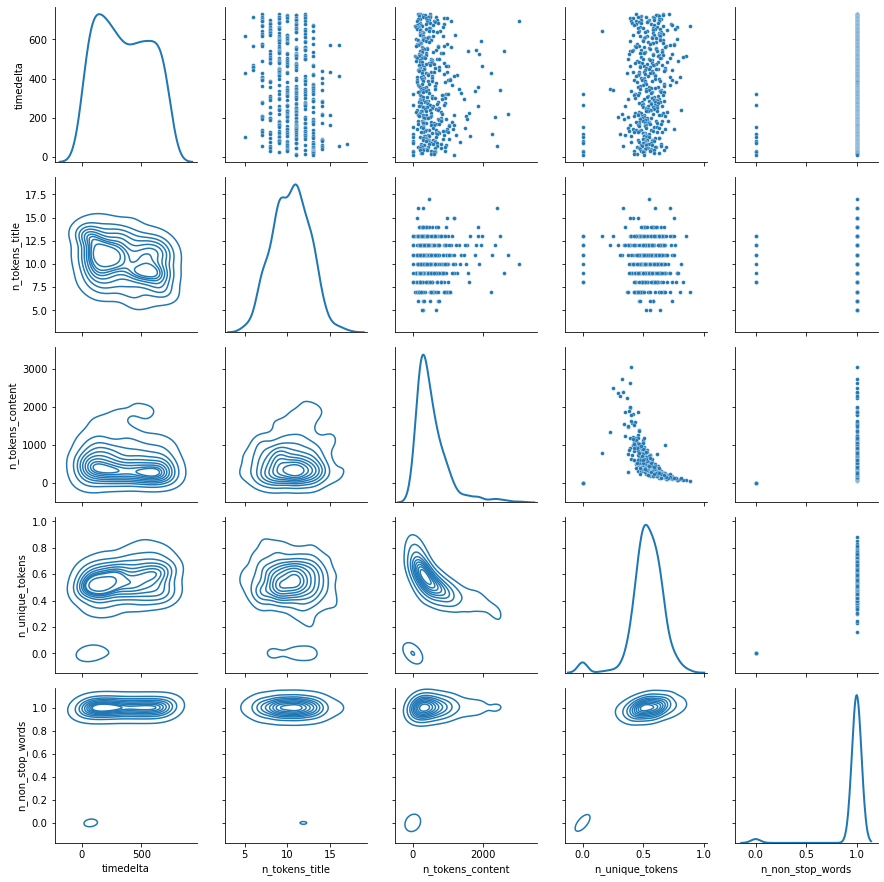

In [12]:
def my_pair_plot(df):
    g = seaborn.PairGrid(df, diag_sharey=False)
    g.map_upper(seaborn.scatterplot, s=15)
    g.map_lower(seaborn.kdeplot)
    g.map_diag(seaborn.kdeplot, lw=2)
    return g

my_pair_plot(data_numeric5[::100]);

Or maybe it is because there are some outliers.

In [13]:
data[data.n_unique_tokens > 100]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
31037,http://mashable.com/2014/08/18/ukraine-civilia...,142.0,9.0,1570.0,701.0,1042.0,650.0,11.0,10.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5900


We remove this row as it seems an outliar:

In [14]:
data_clean = data[data.n_unique_tokens < 100].copy()

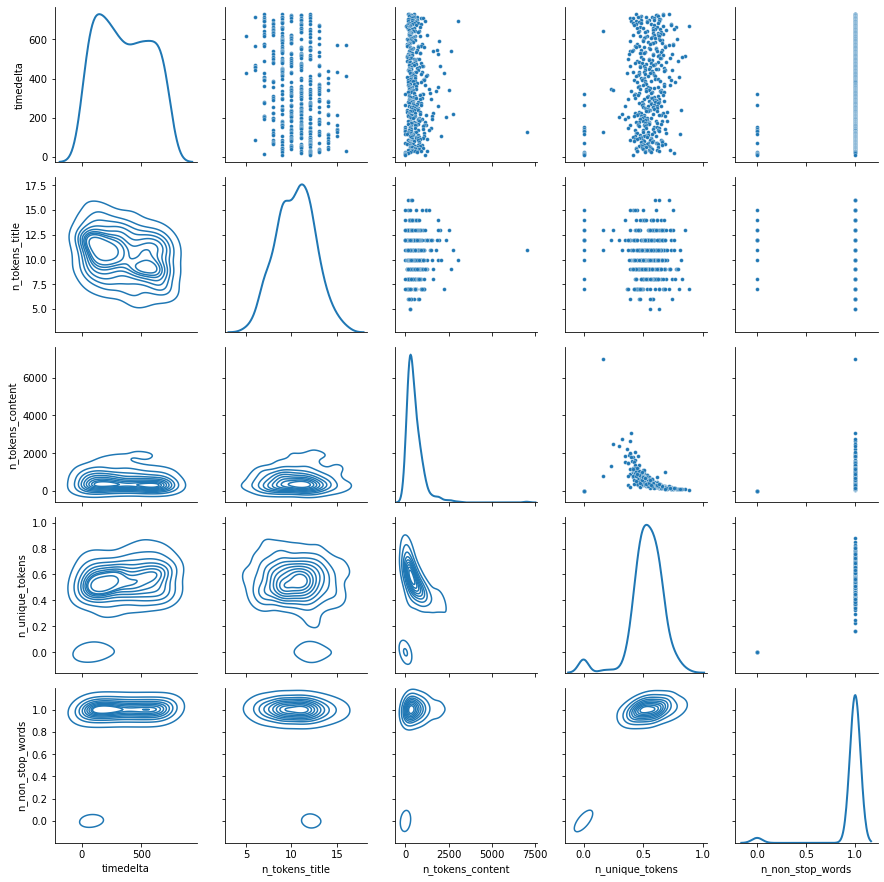

In [15]:
my_pair_plot(data_clean[numeric[:5]][::100]);

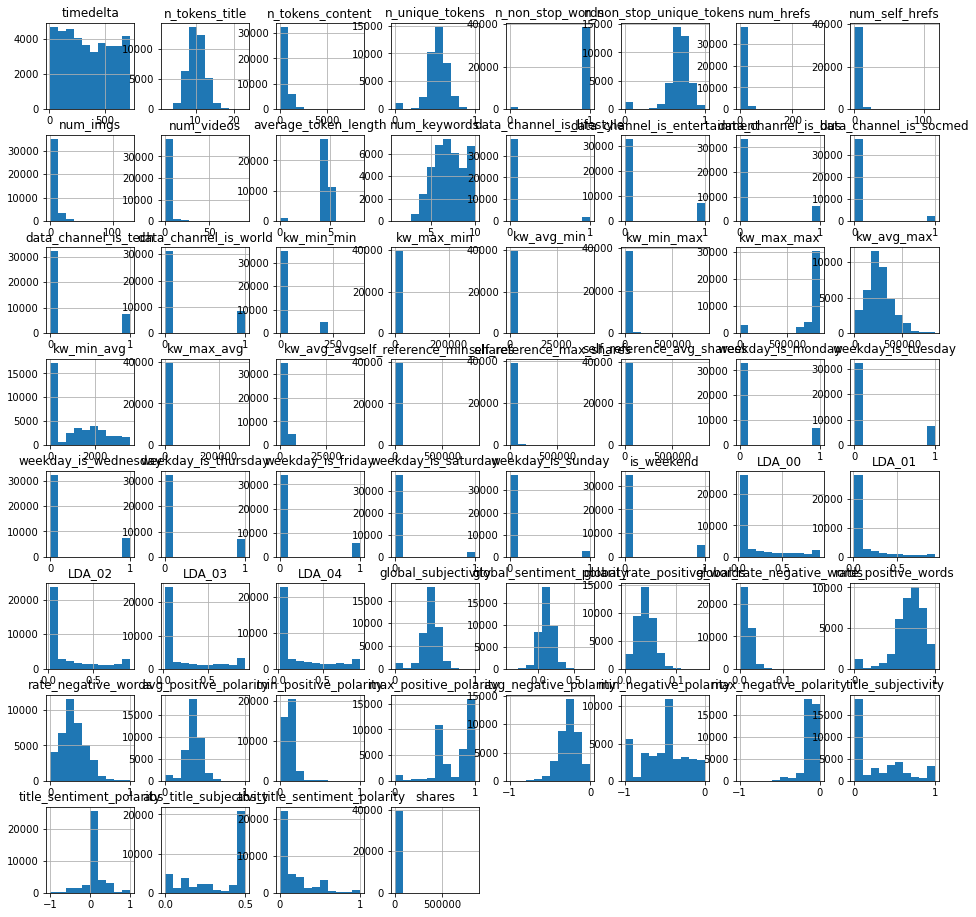

In [16]:
data_clean.hist(figsize=(16,16));

In [17]:
desc = data_clean.describe().T
desc["log"] = (desc["max"] > desc["50%"] * 9) & (desc["max"] > 1)
desc["scale"] = ""
desc.loc[desc["log"],"scale"] = "log"
desc[["mean", "min", "50%", "max", "scale"]]

,mean,min,50%,max,scale
timedelta,354.535832,8.000000,339.000000,731.000000,
n_tokens_title,10.398784,2.000000,10.000000,23.000000,
n_tokens_content,546.488914,0.000000,409.000000,8474.000000,log
n_unique_tokens,0.530547,0.000000,0.539216,1.000000,
n_non_stop_words,0.970209,0.000000,1.000000,1.000000,
n_non_stop_unique_tokens,0.672796,0.000000,0.690476,1.000000,
num_hrefs,10.883687,0.000000,8.000000,304.000000,log
num_self_hrefs,3.293469,0.000000,3.000000,116.000000,log
num_imgs,4.542971,0.000000,1.000000,128.000000,log
num_videos,1.249905,0.000000,0.000000,91.000000,log


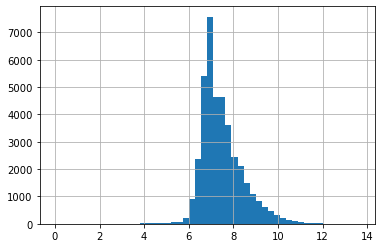

In [18]:
numpy.log(data_clean["shares"]).hist(bins=50);

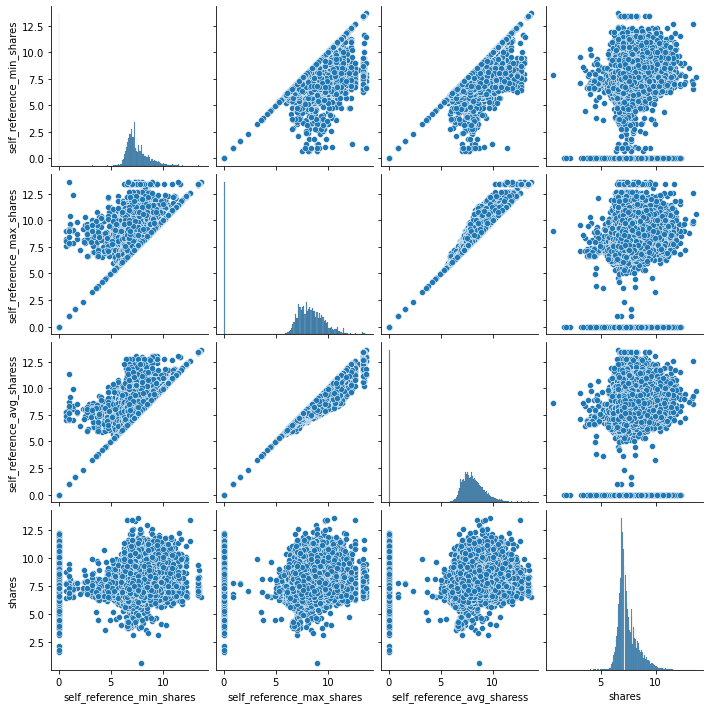

In [19]:
shares = data_clean[[c for c in numeric if "share" in c]].copy()
for c in shares.columns:
    shares[c] = numpy.log(shares[c] + 1)
seaborn.pairplot(shares);

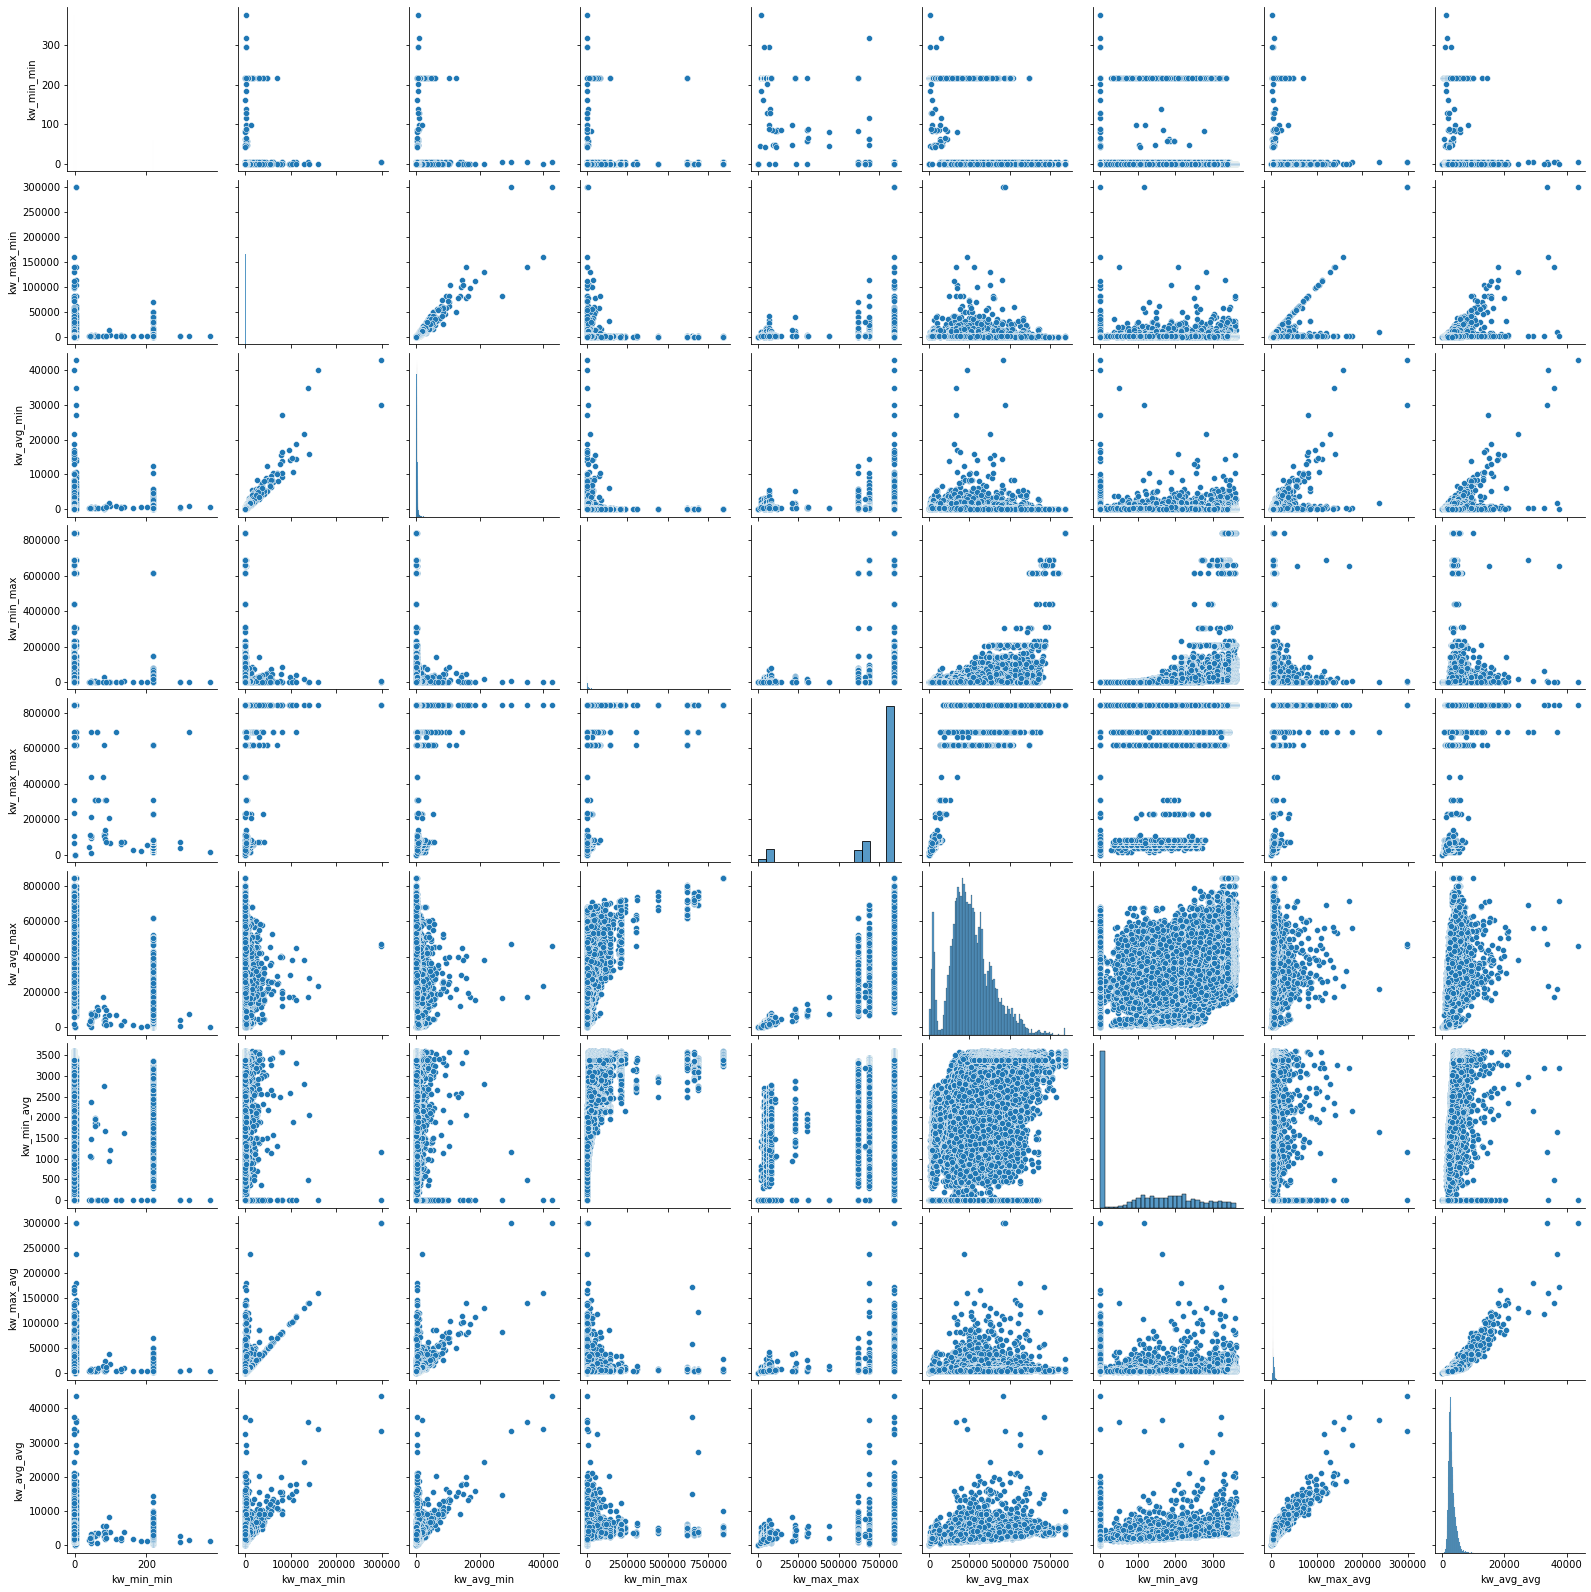

In [20]:
kw = data_clean[[c for c in numeric if "kw" in c]].copy()
seaborn.pairplot(kw);

## Outcome, cleaning scaling

cleaning

In [21]:
data_clean = data[data.n_unique_tokens < 100].copy()

scaling: we consider that if the maximum is far away from the mediane, the scale should be logarithmic as it is far way from a gaussian law, it just applies on this problem

In [22]:
desc = data_clean.describe().T
desc["log"] = (desc["max"] > desc["50%"] * 9) & (desc["max"] > 1)
desc["log+2"] = desc["log"] & (desc["min"] < 0)
desc["scale"] = ""
desc.loc[desc["log"],"scale"] = "log"
desc.loc[desc["log+2"],"scale"] = "log+2"
desc[["mean", "min", "50%", "max", "scale"]]

,mean,min,50%,max,scale
timedelta,354.535832,8.000000,339.000000,731.000000,
n_tokens_title,10.398784,2.000000,10.000000,23.000000,
n_tokens_content,546.488914,0.000000,409.000000,8474.000000,log
n_unique_tokens,0.530547,0.000000,0.539216,1.000000,
n_non_stop_words,0.970209,0.000000,1.000000,1.000000,
n_non_stop_unique_tokens,0.672796,0.000000,0.690476,1.000000,
num_hrefs,10.883687,0.000000,8.000000,304.000000,log
num_self_hrefs,3.293469,0.000000,3.000000,116.000000,log
num_imgs,4.542971,0.000000,1.000000,128.000000,log
num_videos,1.249905,0.000000,0.000000,91.000000,log


In [23]:
import numpy
new_data = data_clean.copy()
for c in desc.index [ desc["scale"] == "log"]:
    new_data[c] = numpy.log(new_data[c] + 1)
for c in desc.index [ desc["scale"] == "log+2"]:
    new_data[c] = numpy.log(new_data[c] + 2)    

In [24]:
new_data.shape

(39643, 61)

In [25]:
set(new_data.dtypes)

{dtype('float64'), dtype('O')}

In [26]:
from sklearn.model_selection import train_test_split

features = new_data[[c for c in numeric if c != "shares"]]
target = new_data["shares"]
X_train, X_test, y_train, y_test = train_test_split(features, target)

## learning

[RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [27]:
from sklearn.ensemble import RandomForestRegressor
clr = RandomForestRegressor(min_samples_leaf=20, n_estimators=50, min_weight_fraction_leaf=0.01, min_samples_split=10)
clr.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=20, min_samples_split=10,
                      min_weight_fraction_leaf=0.01, n_estimators=50)

In [28]:
tpredicted = clr.predict(X_train)
df = pandas.DataFrame()
df["train_predicted"] = tpredicted
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.000000,0.004091
train_expected,0.004091,1.000000


In [29]:
df = pandas.DataFrame()
df["test_predicted"] = clr.predict(X_test)
df["test_expected"] = y_test
df.corr()

,test_predicted,test_expected
test_predicted,1.00000,-0.00921
test_expected,-0.00921,1.00000


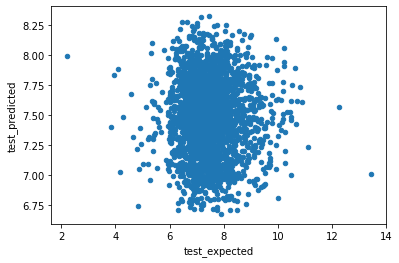

In [30]:
df.plot(x ="test_expected", y="test_predicted", kind="scatter");

[GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(min_samples_leaf=20, n_estimators=50, min_weight_fraction_leaf=0.01, min_samples_split=10)
est.fit(X_train, y_train)

GradientBoostingRegressor(min_samples_leaf=20, min_samples_split=10,
                          min_weight_fraction_leaf=0.01, n_estimators=50)

In [32]:
tpredicted = est.predict(X_train)
df = pandas.DataFrame()
df["train_predicted"] = tpredicted
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.000000,0.008707
train_expected,0.008707,1.000000


In [33]:
df = pandas.DataFrame()
df["train_predicted"] = est.predict(X_train)
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.000000,0.008707
train_expected,0.008707,1.000000


[XGBRegressor](https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py)

In [34]:
import xgboost
clxg = xgboost.XGBRegressor(max_depth=10, learning_rate=0.3, n_estimators=50)
clxg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
xgpredicted = clxg.predict(X_train)
df = pandas.DataFrame()
df["train_predicted"] = xgpredicted
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.000000,0.000811
train_expected,0.000811,1.000000


In [36]:
# trop long
#from sklearn import tree
#from sklearn.ensemble import AdaBoostRegressor
#clfr = tree.DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=10)
#clf2 = AdaBoostRegressor(clfr, n_estimators=800, learning_rate=0.5)
#clf2.fit(X_train, y_train)

## t-SNE

[Comparison of Manifold Learning methods](http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html), [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), [t-distributed Stochastic Neighbor Embedding (t-SNE)](http://scikit-learn.org/stable/modules/manifold.html#t-sne)

In [37]:
from sklearn.model_selection import train_test_split
X_1, X_2, y_1, y_2 = train_test_split(X_train.reset_index(drop=True), 
                        y_train.reset_index(drop=True), test_size=0.2, random_state=42)
X_1.shape, X_2.shape

((23785, 59), (5947, 59))

In [38]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
model

TSNE(random_state=0)

In [39]:
W_2 = model.fit_transform(X_2)

In [40]:
i_2 = y_2.astype(int)

In [41]:
W_2.shape, X_2.shape, y_2.shape, i_2.shape

((5947, 2), (5947, 59), (5947,), (5947,))

In [42]:
mini, maxi = min(i_2), max(i_2)+1

0 (1, 1)
1 (1, 1)
2 (0, 1)
3 (3, 1)
4 (16, 1)
5 (38, 1)
6 (1821, 1)
7 (2646, 1)
8 (978, 1)
9 (321, 1)
10 (96, 1)
11 (24, 1)
12 (2, 1)


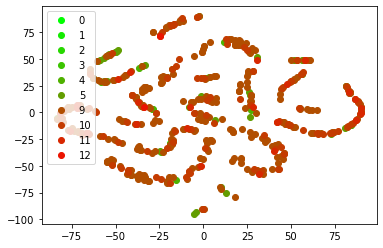

In [43]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()

for i in range(mini, maxi):
    ind = numpy.array(numpy.where(i_2==i)).T
    print(i, ind.shape)
    if i in(6,7,8):
        continue
    m = "o" if i <= 9 else "o"
    r = 1.0*i / maxi
    ax.plot(W_2[ind,0], W_2[ind,1], m, color =(r, 1-r, 0.0), label=str(i))
ax.legend()
ax;